In [1]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tweepy
import json

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key = "qpzxSq1Dqhe0SA8BQnyOiPm5r"
consumer_secret = "fYVqPUSIxvQmXdIbf9XHVx42BmnuFFJxiov7elb0mvLPazVAZt"
access_token = "864212572505034752-uxNQftgyE4MnfJkl1EH9URBmq33oZEu"
access_token_secret = "K3RnPep01YvMNwAKomsGboKbgyYtwKJ8P8M5txCgPgQb6"

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
# Target Search Term
target_term = ("BBC", "CBS", "CNN", "Fox", "nytimes")

# Variables for holding sentiments
sentiments = []


#Loop Through each term
for user in target_term:
    compound_list = []
    counter = 1
    
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline("@" + user, page=x)


        # Loop through all tweets 
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter


            
            sentiments.append({"User": user, 
                               "Date": tweet["created_at"],
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                                "Tweets Ago": counter})
            counter = counter + 1



In [6]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame(sentiments,
                             columns=["User", "Date", "Tweet", "Tweets Ago", "Positive", "Negative", "Neutral", "Compound"])
sentiments_pd.to_csv('NewsMood.csv')
sentiments_pd.head()

,User,Date,Tweet,Tweets Ago,Positive,Negative,Neutral,Compound
0,BBC,Wed Jan 10 19:30:07 +0000 2018,You can count on @BBCComedy's Tracey Ullman fo...,1,0.000,1.000,0.000,0.0000
1,BBC,Wed Jan 10 19:20:39 +0000 2018,RT @BBCNews: How polluted is your street? 😷\n\...,2,0.000,0.769,0.231,-0.4588
2,BBC,Wed Jan 10 19:20:03 +0000 2018,RT @bbcthree: This is what happens when you br...,3,0.000,0.800,0.200,-0.4588
3,BBC,Wed Jan 10 19:00:03 +0000 2018,😂 @OfficialTLC's Scrubs is great song for the ...,4,0.353,0.647,0.000,0.8481
4,BBC,Wed Jan 10 18:32:03 +0000 2018,How much of your home's electricity bill goes ...,5,0.000,1.000,0.000,0.0000


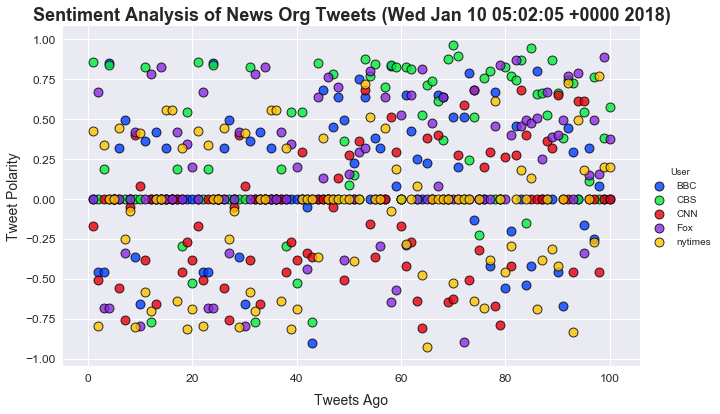

In [10]:
# Set style of scatterplot
sns.set_style("ticks")
plt.style.use("seaborn")


# Create scatterplot using Seaborn
sns.lmplot(x ="Tweets Ago", 
           y ="Compound",
           data=sentiments_pd, 
           hue="User",
           fit_reg=False,
           palette = "bright",
           size = 6,
           aspect = 1.5,
           scatter_kws={"marker": "D",
                        "s": 80,
                      "edgecolor":sns.xkcd_rgb["black"],
                      "linewidth": 1})

# Set title, x and y labels, sizing, and formatting of chart
plt.title("Sentiment Analysis of News Org Tweets ({})".format(tweet["created_at"]), fontsize = 18, fontweight='bold')
plt.xlabel("Tweets Ago", labelpad=10, fontsize = 14)
plt.ylabel("Tweet Polarity",fontsize = 14)
plt.subplots_adjust(top=0.88)
plt.xticks(size = 12)
plt.yticks(size = 12)

# Save Image
plt.savefig("Sentiment_Analysis_ScatterPlot.png")

plt.show()

In [8]:
# Grop to calculate overall compound score
Overall_sentiment = sentiments_pd.groupby(['User']).mean()["Compound"]
Overall_sentiment_pd = pd.DataFrame.from_dict(Overall_sentiment)
Overall_sentiment_pd["Compound"]

User
BBC        0.102555
CBS        0.315240
CNN       -0.069004
Fox        0.170988
nytimes   -0.072181
Name: Compound, dtype: float64

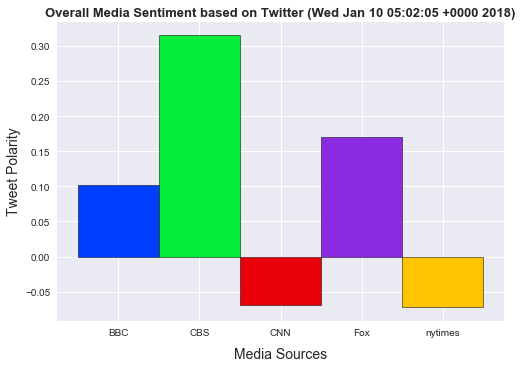

In [9]:
# Create Bar chart using Matplotlib
colors = ("#003FFF", "#03ED3A", "#E8000B", "#8A2BE2", "#FFC400")
plt.bar(target_term, Overall_sentiment_pd["Compound"], color=colors, alpha = 1, width =1, 
        edgecolor="black", linewidth=0.5)

# Set title, x and y labels
plt.title("Overall Media Sentiment based on Twitter ({})".format(tweet["created_at"]), fontsize = 13, 
          fontweight='bold')
plt.xlabel("Media Sources", labelpad=10, fontsize = 14)
plt.ylabel("Tweet Polarity",fontsize = 14)

plt.show()
# Save image
plt.savefig("Overall_Sentiment_Analysis_BarChart.png")